**Bank dataset to understand the reason why customers leave the bank. The idea is to build a predictive model that can predict if any new customer leaves the bank. Model is trained on the dataset "Churn_Modelling". This is clasification task.**

**Bulding ML model with Neural Network (NN) -  Neural networks are capable of handling the complexity and nuances of customer behaviour in ways that simpler models cannot. They are especially valuable in data-rich environments where learning about subtle patterns is key to predicting customer churn.**

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Importing the dataset and checking for NAN and duplicates. Droping them.

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
if 1 in (dataset.isnull().sum().values):
    dataset=dataset.dropna(axis=0)
dataset=dataset.drop_duplicates()
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [3]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1.0 1.0 101348.88]
 [608 'Spain' 'Female' ... 0.0 1.0 112542.58]
 [502 'France' 'Female' ... 1.0 0.0 113931.57]
 ...
 [709 'France' 'Female' ... 0.0 1.0 42085.58]
 [772 'Germany' 'Male' ... 1.0 0.0 92888.52]
 [792 'France' 'Female' ... 1.0 0.0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1.0 1.0 101348.88]
 [608 'Spain' 0 ... 0.0 1.0 112542.58]
 [502 'France' 0 ... 1.0 0.0 113931.57]
 ...
 [709 'France' 0 ... 0.0 1.0 42085.58]
 [772 'Germany' 1 ... 1.0 0.0 92888.52]
 [792 'France' 0 ... 1.0 0.0 38190.78]]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1.0 1.0 101348.88]
 [0.0 0.0 1.0 ... 0.0 1.0 112542.58]
 [1.0 0.0 0.0 ... 1.0 0.0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0.0 1.0 42085.58]
 [0.0 1.0 0.0 ... 1.0 0.0 92888.52]
 [1.0 0.0 0.0 ... 1.0 0.0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling necessary for NN.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the NN

### Initializing the NN

In [12]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the NN

### Compiling the NN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the NN on the Training set

In [17]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.4664 - loss: 0.7511
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8006 - loss: 0.4925
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8007 - loss: 0.4534
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8028 - loss: 0.4343
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8115 - loss: 0.4210
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.8240 - loss: 0.4107
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8251 - loss: 0.4120
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8250 - loss: 0.4090
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.8314 - loss: 0.4056
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8380 - loss: 0.3924
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.8421 - loss: 0.3897
Epoch 12/100
250/25

## Part 4 - Making the predictions and evaluating the model

**Solution**

### Predicting the Test set results

In [18]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


### Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC:", roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[1507   58]
 [ 242  193]]
Accuracy: 0.85
ROC: 0.7033087290220704
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1565
           1       0.77      0.44      0.56       435

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.84      0.85      0.83      2000



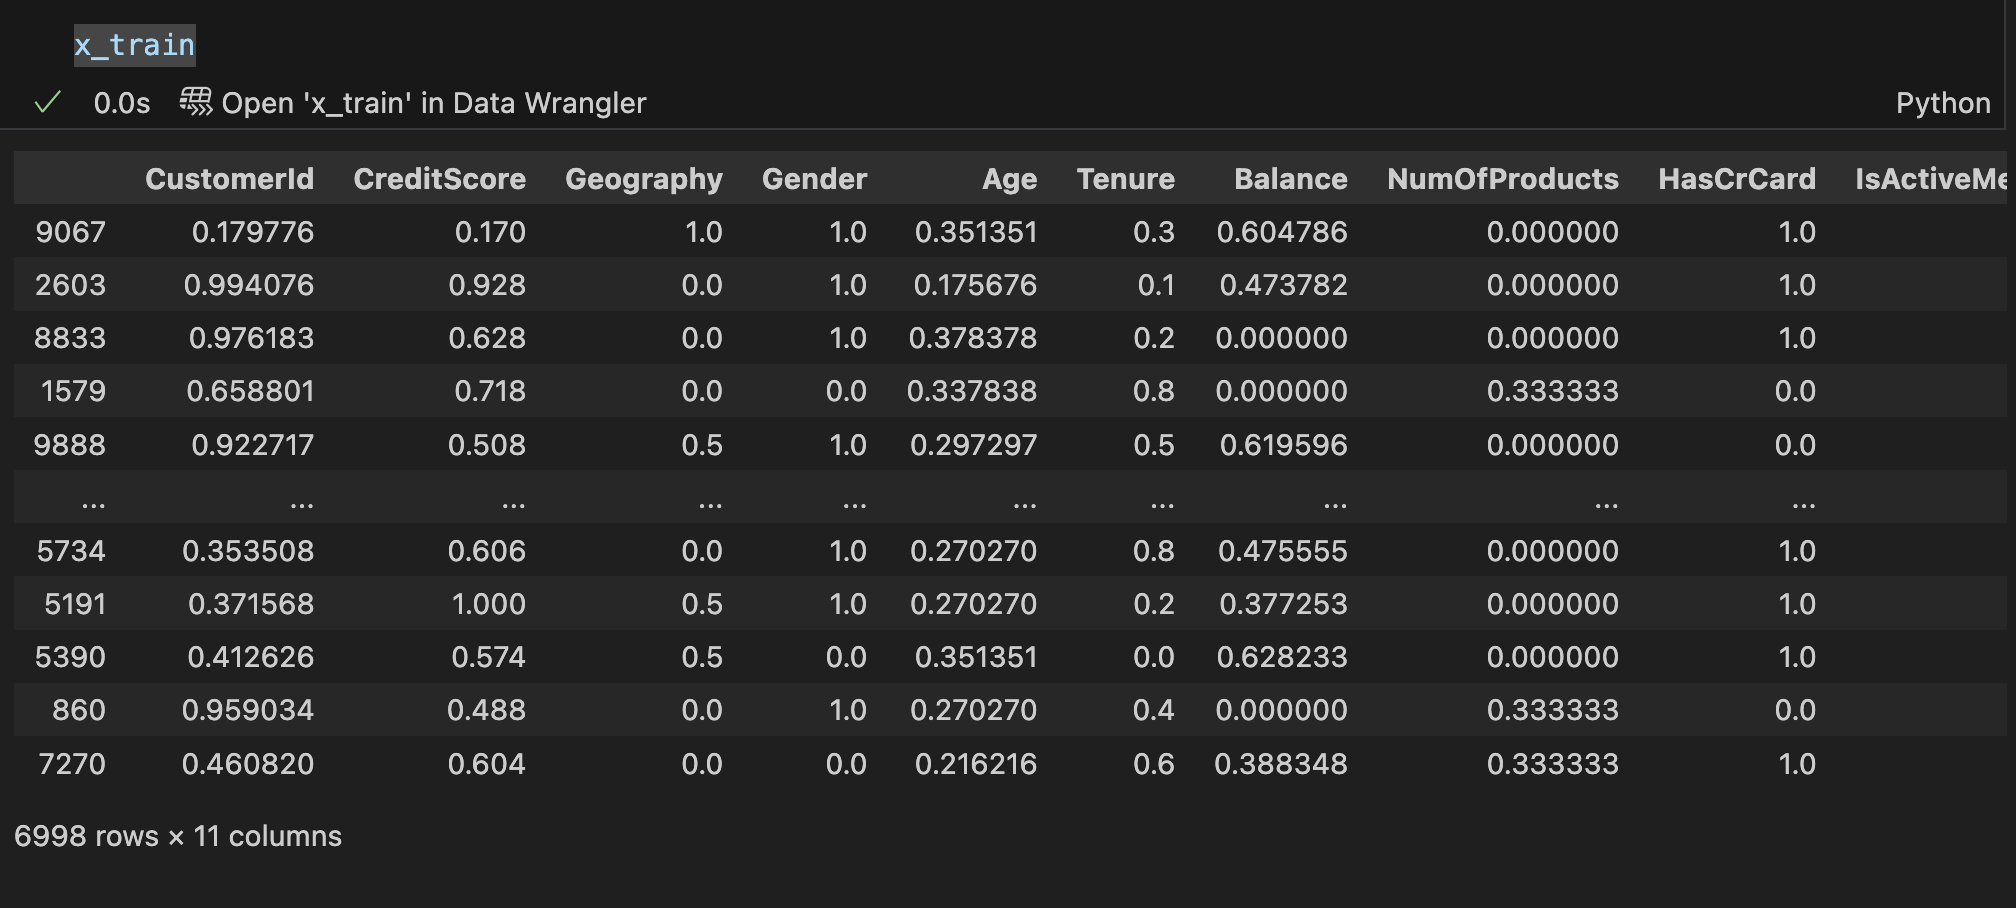

In [20]:
from IPython.display import Image
Image("image.png")

Note: 
In the above example from another work, the column "CustomerId" has been used to train the model, which led to a little bit better result than mine.
I disagree that such an approach this column to be used. It increases the result but pure mathematically  - addind new fetures always does this.
However it overfits the model, thus making it not a good predictor on the data it has not seen.